### Module 2: Bayesian Network - Demo 1: Late to Office

In [ ]:
!pip install pgmpy==0.1.21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.24.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2

In [ ]:
#Bayesian Model
from pgmpy.models import BayesianModel

ModuleNotFoundError: No module named 'pgmpy'

### Create an empty Bayesian Network and add nodes, edges to it

In [ ]:
# initialize an empty BN or a model with nodes and edges.
model = BayesianModel()

In [ ]:
#Add nodes and edges to this network:
model.add_nodes_from(['smog', 'traffic'])
model.add_edge('smog', 'traffic')


In [ ]:
model.nodes()

['smog', 'traffic']

In [ ]:
model.edges()

[('smog', 'traffic')]

In [ ]:
model.add_edge('accident', 'traffic')
model.nodes()

['smog', 'traffic', 'accident']

In [ ]:
model.edges()

[('smog', 'traffic'), ('accident', 'traffic')]

### Define CPD's for all the nodes and add them to the network

In [ ]:
from pgmpy.factors.discrete import TabularCPD
cpd_smog = TabularCPD('smog', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic = TabularCPD('traffic', 2,
                                [[0.9, 0.6, 0.7, 0.1],
                                 [0.1, 0.4, 0.3, 0.9]],
                                evidence=['smog', 'accident'],
                                evidence_card=[2, 2])
print("CPD of Smog", cpd_smog, end="\n")
print("CPD of Accident", cpd_accident, end="\n")
print("CPD of Traffic Jam", cpd_traffic, end="\n")


CPD of Smog +--------+-----+
| smog_0 | 0.4 |
+--------+-----+
| smog_1 | 0.6 |
+--------+-----+
CPD of Accident +------------+-----+
| accident_0 | 0.2 |
+------------+-----+
| accident_1 | 0.8 |
+------------+-----+
CPD of Traffic Jam +-----------+------------+------------+------------+------------+
| smog      | smog_0     | smog_0     | smog_1     | smog_1     |
+-----------+------------+------------+------------+------------+
| accident  | accident_0 | accident_1 | accident_0 | accident_1 |
+-----------+------------+------------+------------+------------+
| traffic_0 | 0.9        | 0.6        | 0.7        | 0.1        |
+-----------+------------+------------+------------+------------+
| traffic_1 | 0.1        | 0.4        | 0.3        | 0.9        |
+-----------+------------+------------+------------+------------+


In [ ]:
model.add_cpds(cpd_smog, cpd_accident, cpd_traffic)
model.get_cpds()


[<TabularCPD representing P(smog:2) at 0x7f3057b0f908>,
 <TabularCPD representing P(accident:2) at 0x7f3057b0f8d0>,
 <TabularCPD representing P(traffic:2 | smog:2, accident:2) at 0x7f3057b0f898>]

In [ ]:
model.add_nodes_from(['woke_late',
                               'late_to_office'])
model.add_edges_from(
                   [('woke_late', 'late_to_office'),
                    ('traffic', 'late_to_office')])
cpd_woke_late = TabularCPD('woke_late', 2,
                                          [[0.6], [0.4]])
cpd_late_to_office = TabularCPD(
                               'late_to_office', 2,
                               [[0.9, 0.45, 0.8, 0.1],
                                [0.1, 0.55, 0.2, 0.9]],
                               evidence=['woke_late',
                                         'traffic'],evidence_card=[2, 2])
model.add_cpds(cpd_woke_late, cpd_late_to_office)
model.get_cpds()


[<TabularCPD representing P(smog:2) at 0x7f3057b0f908>,
 <TabularCPD representing P(accident:2) at 0x7f3057b0f8d0>,
 <TabularCPD representing P(traffic:2 | smog:2, accident:2) at 0x7f3057b0f898>,
 <TabularCPD representing P(woke_late:2) at 0x7f3057b0f4a8>,
 <TabularCPD representing P(late_to_office:2 | woke_late:2, traffic:2) at 0x7f3057b0f3c8>]

### Model consistency

In [ ]:
model.check_model()

True

### Local Dependencies

In [ ]:

model.local_independencies('traffic')


(traffic _|_ woke_late | accident, smog)

In [ ]:
model.local_independencies(['woke_late', 'traffic', 'accident','smog', 'late_to_office'])

(woke_late _|_ accident, smog, traffic)
(traffic _|_ woke_late | accident, smog)
(accident _|_ smog, woke_late)
(smog _|_ accident, woke_late)
(late_to_office _|_ accident, smog | traffic, woke_late)

### Graphical Representation of the Network

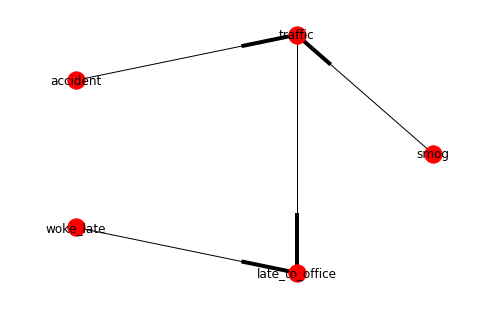

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_shell(model,with_labels=True)
plt.show()


### Assignment

1. Explain the influence of each customer attribute on campaign Success using the given
Bayesian Network.
2. Draw the Bayesian Network diagram showing nodes and directed edges as per the
dependency structure described above.
3. What is the probability that a customer purchased after the campaign (Success = Yes),
given that the customer is Female?
4. Among customers aged 35, what proportion reported Success = Yes in the
campaign?
5. Is there a significant difference in Success rates between Employed and Unemployed
customers?
6. Among customers who have a Business = Yes and are Married, what is the
probability of Success?
7. What is the joint probability of a Male, ≤35 years old, Employed, Married customer
achieving Success?

Explain the influence of each customer attribute on campaign Success using the given Bayesian Network.

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
model = DiscreteBayesianNetwork([
    ('Gender', 'Success'),
    ('Age', 'Success'),
    ('Employment', 'Success'),
    ('Marital_Status', 'Success'),
    ('Business', 'Success')
])
cpd_gender = TabularCPD(variable='Gender', variable_card=2, values=[[0.5], [0.5]], state_names={'Gender': ['Male', 'Female']})
cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.6], [0.4]], state_names={'Age': ['<=35', '>35']})
cpd_employment = TabularCPD(variable='Employment', variable_card=2, values=[[0.7], [0.3]], state_names={'Employment': ['Employed', 'Unemployed']})
cpd_marital = TabularCPD(variable='Marital_Status', variable_card=2, values=[[0.6], [0.4]], state_names={'Marital_Status': ['Married', 'Single']})
cpd_business = TabularCPD(variable='Business', variable_card=2, values=[[0.4], [0.6]], state_names={'Business': ['Yes', 'No']})
cpd_success = TabularCPD(
    variable='Success',
    variable_card=2,
    values=[
        [0.6, 0.7, 0.8, 0.9, 0.4, 0.5, 0.6, 0.7, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4,
         0.5, 0.6, 0.7, 0.8, 0.3, 0.4, 0.5, 0.6, 0.1, 0.2, 0.3, 0.4, 0.05, 0.1, 0.15, 0.2],
        [0.4, 0.3, 0.2, 0.1, 0.6, 0.5, 0.4, 0.3, 0.8, 0.7, 0.6, 0.5, 0.9, 0.8, 0.7, 0.6,
         0.5, 0.4, 0.3, 0.2, 0.7, 0.6, 0.5, 0.4, 0.9, 0.8, 0.7, 0.6, 0.95, 0.9, 0.85, 0.8]
    ],
    evidence=['Gender', 'Age', 'Employment', 'Marital_Status', 'Business'],
    evidence_card=[2, 2, 2, 2, 2],
    state_names={
        'Success': ['Yes', 'No'],
        'Gender': ['Male', 'Female'],
        'Age': ['<=35', '>35'],
        'Employment': ['Employed', 'Unemployed'],
        'Marital_Status': ['Married', 'Single'],
        'Business': ['Yes', 'No']
    }
)
model.add_cpds(cpd_gender, cpd_age, cpd_employment, cpd_marital, cpd_business, cpd_success)
model.check_model()

True

Draw the Bayesian Network diagram showing nodes and directed edges as per the dependency structure described above.

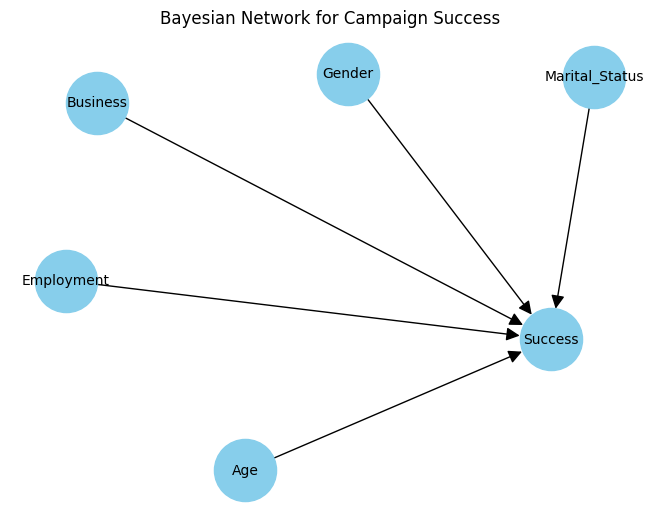

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, arrowsize=20)
plt.title('Bayesian Network for Campaign Success')
plt.show()

What is the probability that a customer purchased after the campaign (Success = Yes), given that the customer is Female?

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
result = inference.query(variables=['Success'], evidence={'Gender': 'Female'})
print(result)

+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.4296 |
+--------------+----------------+
| Success(No)  |         0.5704 |
+--------------+----------------+


Among customers aged >35, what proportion reported Success = Yes in the campaign?

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
result = inference.query(variables=['Success'], evidence={'Age': '>35'})
print(result)

+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.2570 |
+--------------+----------------+
| Success(No)  |         0.7430 |
+--------------+----------------+


Is there a significant difference in Success rates between Employed and Unemployed customers?

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
prob_success_employed = inference.query(variables=['Success'], evidence={'Employment': 'Employed'})
prob_success_unemployed = inference.query(variables=['Success'], evidence={'Employment': 'Unemployed'})

print("Probability of Success given Employed:")
print(prob_success_employed)
print("\nProbability of Success given Unemployed:")
print(prob_success_unemployed)

Probability of Success given Employed:
+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.5300 |
+--------------+----------------+
| Success(No)  |         0.4700 |
+--------------+----------------+

Probability of Success given Unemployed:
+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.3660 |
+--------------+----------------+
| Success(No)  |         0.6340 |
+--------------+----------------+


Among customers who have a Business = Yes and are Married, what is the probability of Success?

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
result = inference.query(variables=['Success'], evidence={'Business': 'Yes', 'Marital_Status': 'Married'})
print(result)

+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.3450 |
+--------------+----------------+
| Success(No)  |         0.6550 |
+--------------+----------------+


What is the joint probability of a Male, ≤35 years old, Employed, Married customer achieving Success?

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
result = inference.query(variables=['Success'],
                       evidence={'Gender': 'Male', 'Age': '<=35', 'Employment': 'Employed', 'Marital_Status': 'Married'})
print(result)

+--------------+----------------+
| Success      |   phi(Success) |
+==============+================+
| Success(Yes) |         0.6600 |
+--------------+----------------+
| Success(No)  |         0.3400 |
+--------------+----------------+
